# 3 Simple Ways to Create a Waterfall Plot in Python

## Setup

In [1]:
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import waterfall_chart
from waterfall_ax import WaterfallChart
import plotly.graph_objects as go

# settings
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
%config InlineBackend.figure_format = 'retina'

## Data

In [3]:
df = pd.DataFrame(
    data={
        "time": ["2021 end", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
        "users": [100, 120, 110, 150, 160, 190, 240, 200, 230, 240, 250, 280, 300]
    }
)
df

,time,users
0,2021 end,100
1,Jan,120
2,Feb,110
3,Mar,150
4,Apr,160
5,May,190
6,Jun,240
7,Jul,200
8,Aug,230
9,Sep,240


## Approach #1: `waterfall_ax`

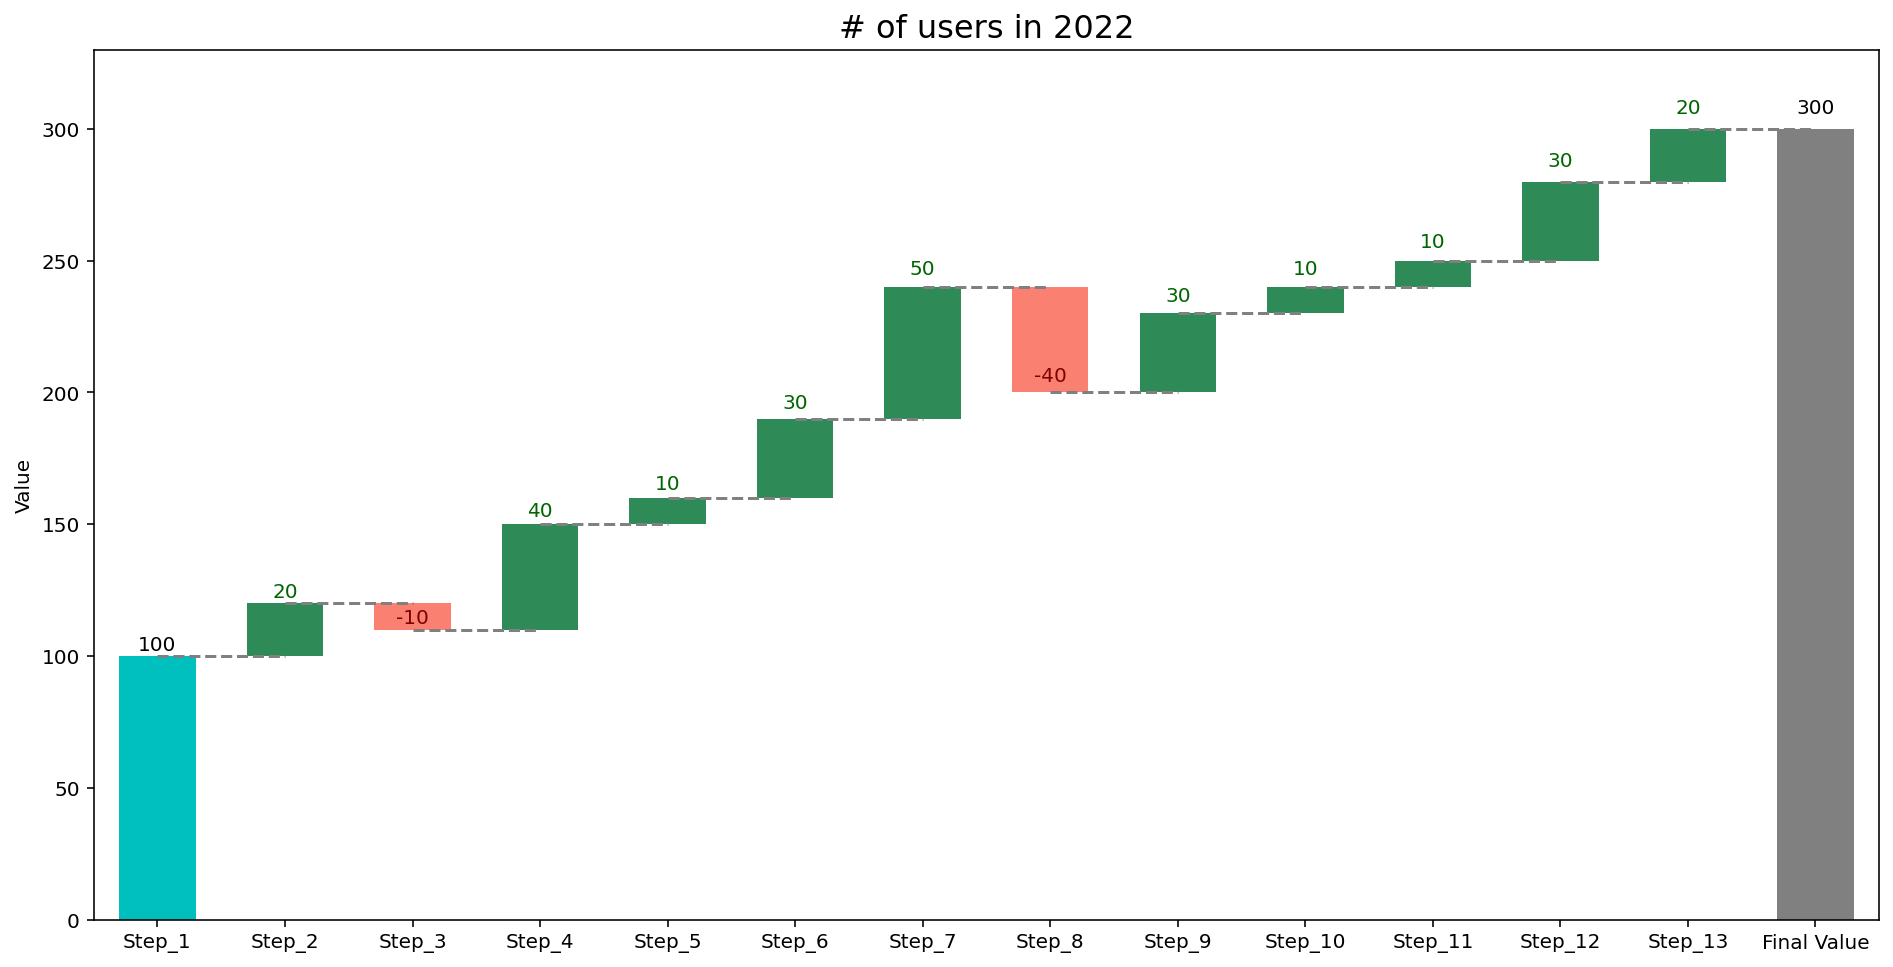

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
waterfall = WaterfallChart(df["users"].to_list())
wf_ax = waterfall.plot_waterfall(ax=ax, title="# of users in 2022")


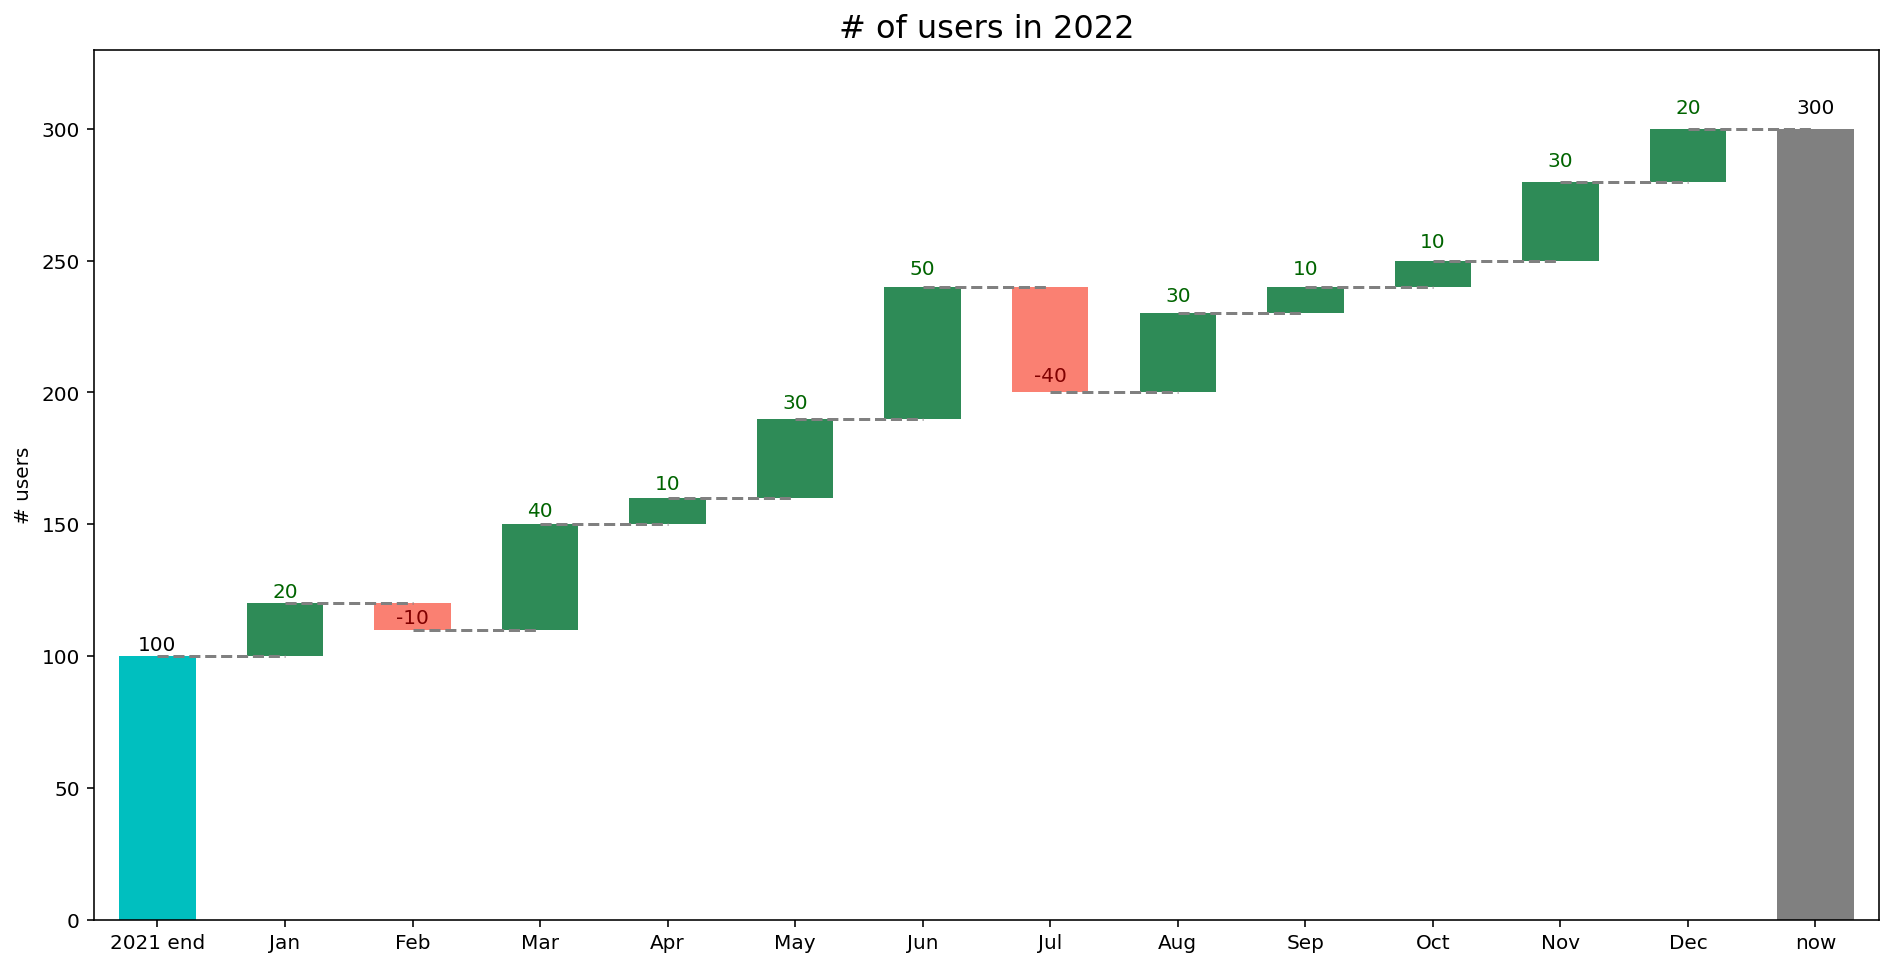

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
waterfall = WaterfallChart(
    df["users"].to_list(),
    step_names=df["time"].to_list(), 
    metric_name="# users", 
    last_step_label="now"
)
wf_ax = waterfall.plot_waterfall(ax=ax, title="# of users in 2022")


## Approach #2: `waterfall`

In [6]:
df_1 = df.copy()
df_1["delta"] = df_1["users"].diff().fillna(100)
df_1

,time,users,delta
0,2021 end,100,100.0
1,Jan,120,20.0
2,Feb,110,-10.0
3,Mar,150,40.0
4,Apr,160,10.0
5,May,190,30.0
6,Jun,240,50.0
7,Jul,200,-40.0
8,Aug,230,30.0
9,Sep,240,10.0


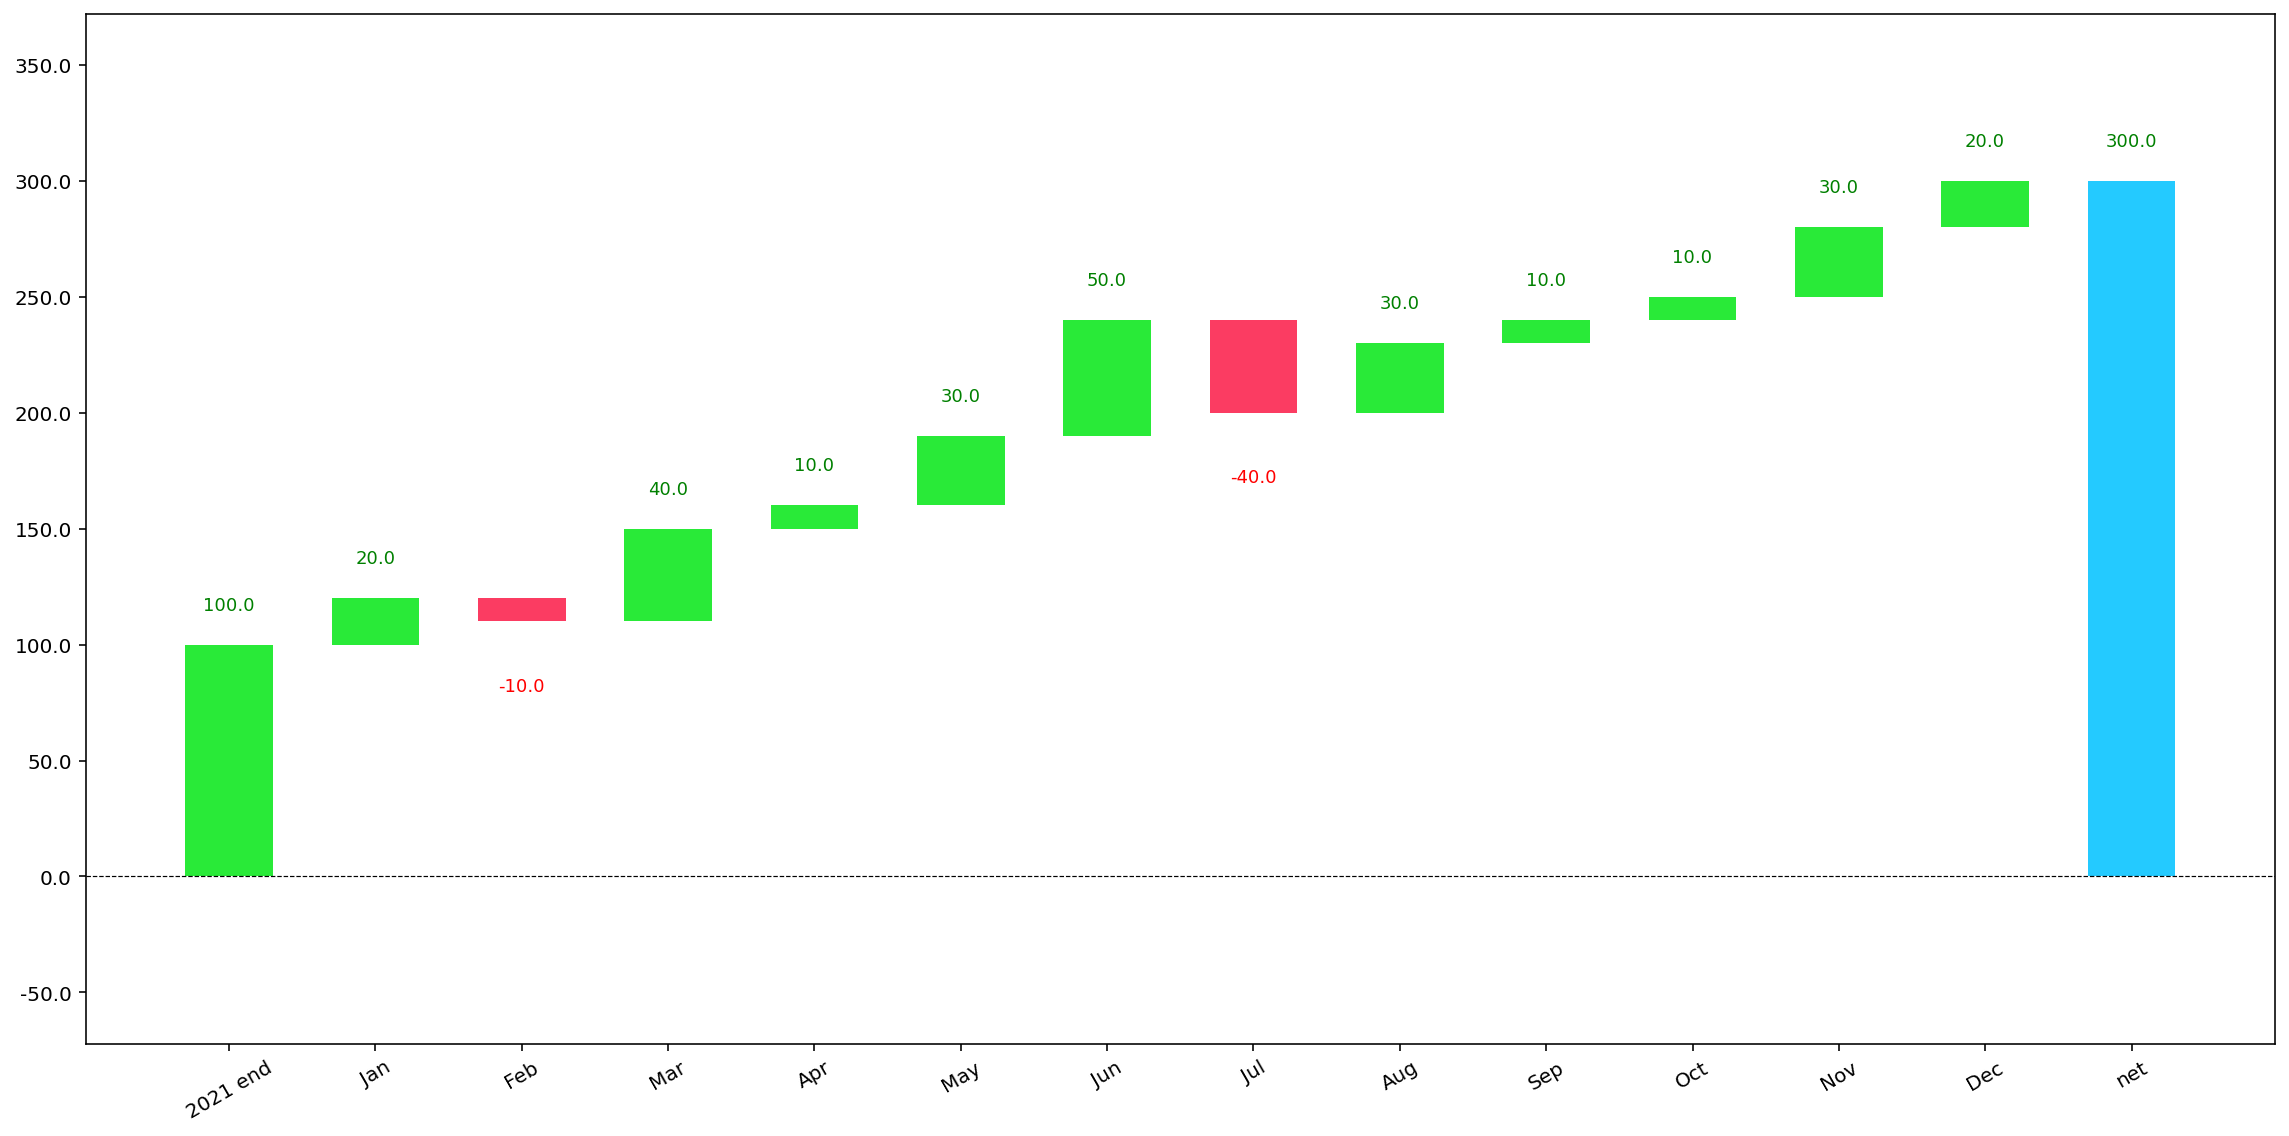

In [7]:
waterfall_chart.plot(df_1["time"], df_1["delta"]);

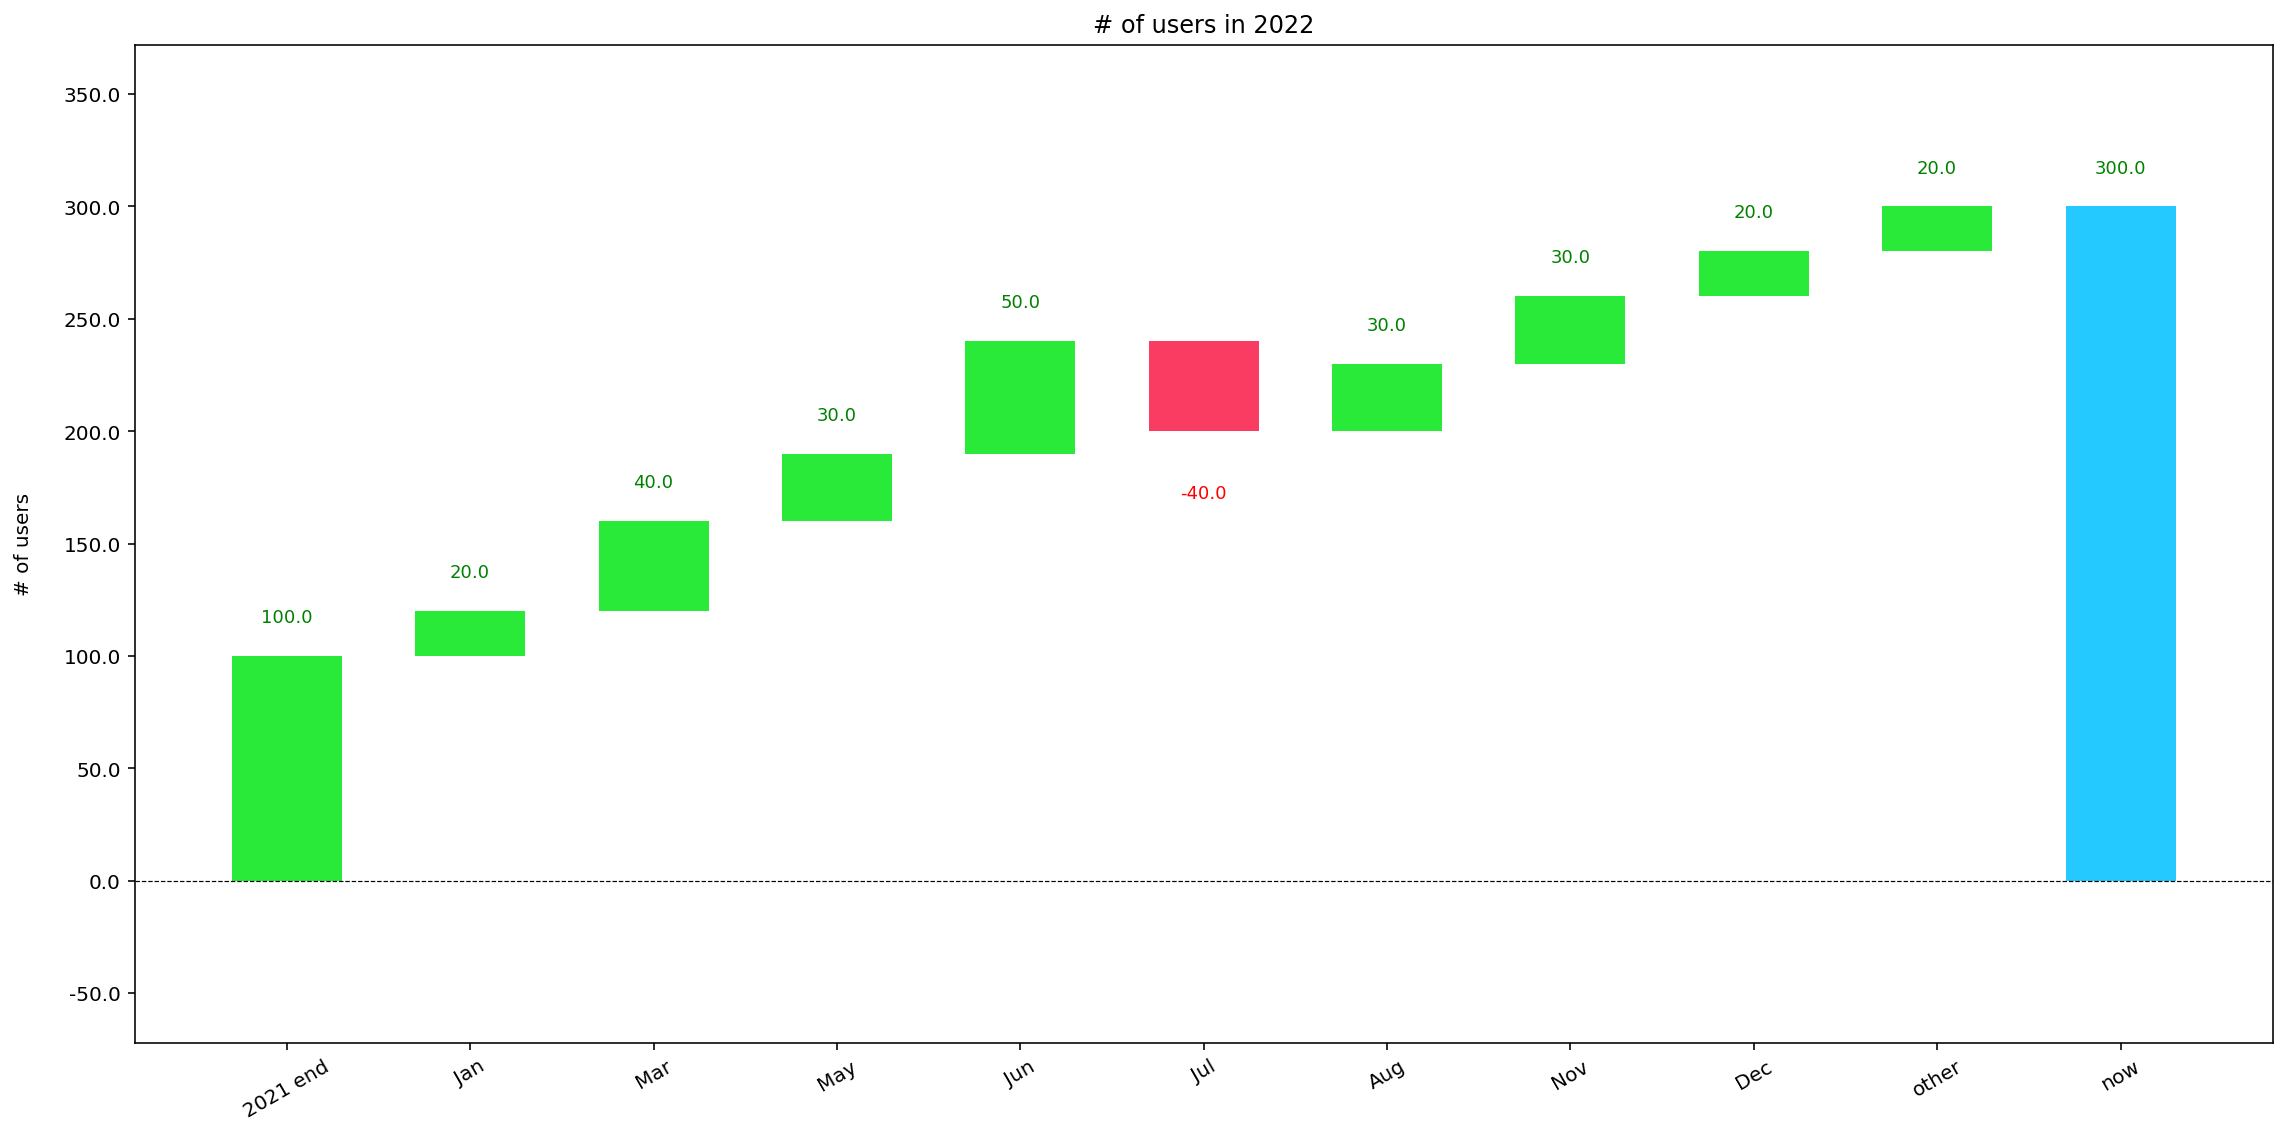

In [8]:
waterfall_chart.plot(
    df_1["time"], 
    df_1["delta"], 
    threshold=0.20, 
    net_label="now", 
    y_lab="# of users", 
    Title="# of users in 2022"
);

## Approach #3: `plotly`

In [9]:
df_2 = df_1.copy()
df_2["delta_text"] = df_2["delta"].astype(str)
df_2["measure"] = ["absolute"] + (["relative"] * 12)
df_2

,time,users,delta,delta_text,measure
0,2021 end,100,100.0,100.0,absolute
1,Jan,120,20.0,20.0,relative
2,Feb,110,-10.0,-10.0,relative
3,Mar,150,40.0,40.0,relative
4,Apr,160,10.0,10.0,relative
5,May,190,30.0,30.0,relative
6,Jun,240,50.0,50.0,relative
7,Jul,200,-40.0,-40.0,relative
8,Aug,230,30.0,30.0,relative
9,Sep,240,10.0,10.0,relative


In [10]:
fig = go.Figure(
    go.Waterfall(
        measure=df_2["measure"],
        x=df_2["time"],
        textposition="outside",
        text=df_2["delta_text"],
        y=df_2["delta"],
    )
)

fig.update_layout(
    title="# of users in 2022",
    showlegend=False
)

fig.show()

In [11]:
total_row = pd.DataFrame(
    data={
        "time": "now", 
        "users": 0, 
        "delta":0, 
        "delta_text": "", 
        "measure": "total"
    }, 
    index=[0]
)
df_3 = pd.concat([df_2, total_row], ignore_index=True)
df_3

,time,users,delta,delta_text,measure
0,2021 end,100,100.0,100.0,absolute
1,Jan,120,20.0,20.0,relative
2,Feb,110,-10.0,-10.0,relative
3,Mar,150,40.0,40.0,relative
4,Apr,160,10.0,10.0,relative
5,May,190,30.0,30.0,relative
6,Jun,240,50.0,50.0,relative
7,Jul,200,-40.0,-40.0,relative
8,Aug,230,30.0,30.0,relative
9,Sep,240,10.0,10.0,relative


In [12]:
fig = go.Figure(
    go.Waterfall(
        measure=df_3["measure"],
        x=df_3["time"],
        textposition="outside",
        text=df_3["delta_text"],
        y=df_3["delta"],
    )
)

fig.update_layout(
    title="# of users in 2022",
    showlegend=False
)

fig.show()